### Gaussian Naive Bayes Classification of Iris

Earlier we looked at using discretizing bins of the input attributes to calculate the conditional probabilities. We do not need to do that. We can assume that the attributes are Gaussian. In that case we can estimate the probability directly from the Gaussian distribution.

Using the Iris dataset:

| Dataset             | Iris
|---------------------|-----------------------------------|
| Number of Instances | 150 (50 per class) |
| Number of Attributes | 4 numeric                        |
| Attribute            | Sepal length/cm               |
| Attribute            | Sepal width/cm                |
|  Attribute           | Petal length/cm               |
|  Attribute           | Petal width/cm                |
| class                | Iris-Setosa                      |
| class                | Iris-Versicolour                 |
| class                | Iris-Virginica                   |


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd

# import iris data 
iris = datasets.load_iris()
column_names = iris.feature_names

iris.data[:20,:] #X
iris.target[:20] #Y

#put it in a dataframe
#df=pd.DataFrame(iris.data,columns= column_names)
#df.head()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [2]:
iris.data[iris.target==0]
iris.data[iris.target==1]
iris.data[iris.target==2]

array([[6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2

Calculate the mean and sd for all the 3 classes

In [4]:
#mean
print(iris.data[iris.target==0].mean(axis=0))
print(iris.data[iris.target==1].mean(axis=0))
print(iris.data[iris.target==2].mean(axis=0))

[5.006 3.428 1.462 0.246]
[5.936 2.77  4.26  1.326]
[6.588 2.974 5.552 2.026]


In [5]:
#standard deviation
print(iris.data[iris.target==0].std(axis=0))
print(iris.data[iris.target==1].std(axis=0))
print(iris.data[iris.target==2].std(axis=0))

[0.34894699 0.37525458 0.17191859 0.10432641]
[0.51098337 0.31064449 0.46518813 0.19576517]
[0.62948868 0.31925538 0.54634787 0.27188968]


Plot the normal curves for sepal length for all classes

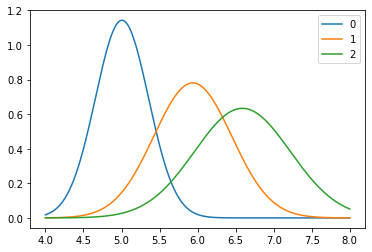

In [8]:
#plot the gaussian given mean and sd - attribute 0 sepal length

from scipy.stats import norm

x_axis = np.arange(4,8, 0.001)
fig,ax=plt.subplots()
ax.plot(x_axis, norm.pdf(x_axis,5.006,0.349),label='0')
ax.plot(x_axis, norm.pdf(x_axis,5.936,0.51098337),label='1')
ax.plot(x_axis, norm.pdf(x_axis,6.588,0.62948868),label='2')

#add here
ax.legend()
plt.show()

Plot the normal curves for petal length for all classes

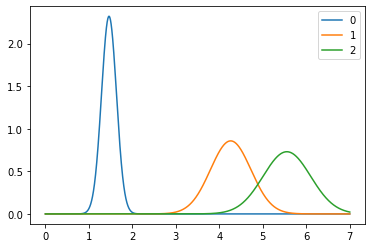

In [7]:
#plot the gaussian given mean and sd - attribute 2 petal length
x_axis = np.arange(0,7, 0.001)
fig,ax=plt.subplots()
ax.plot(x_axis, norm.pdf(x_axis,1.462,0.1719),label='0')
ax.plot(x_axis, norm.pdf(x_axis,4.26,0.46518813),label='1')
ax.plot(x_axis, norm.pdf(x_axis,5.552,0.54634787),label='2')
#add here
ax.legend()
plt.show()

Lets say now i have a new specimen with the sepal length=5.1 and petal length=3.0, what is the most probable class?

To calculate $P(y|x_{1},..,x_{n}) \propto P(y)\prod_{i=1}^{n}{P(x_{i}|y)}$ 

Instead of looking up the counts in a table, we simply read of the probability from the Gaussian curve. 

$P(x_{i}|y) = \frac{1}{\sqrt{2\pi\sigma^2}} exp (-\frac{(x_{i}-u)^2}{2\sigma^2})$

and

$P(y|x_{1},..,x_{n}) \propto P(y)P(x_{0}|y)P(x_{2}|y) $

Define the $P(x_{i}|y)$ below: (20%)

In [12]:
from math import *
import math as math

def px_y(x,mean,sigma):
    return(1/(math.sqrt(2*math.pi*(sigma**2)))*math.exp(-((x - mean)**2)/(2*(sigma**2))))
    

Calculate $P(x_{0}|y)P(x_{2}|y)$ for each class and determine which is the most probable class (80%)

In [18]:
# Calculate P(X0|Y)(PX2|Y)

print("P(Y=0 | X0= 5.1, X2=3.0)=", px_y(5.1,5.006,0.349)*px_y(3.0,1.462,0.1719))
print("P(Y=1 | X0= 5.1, X2=3.0)=", px_y(5.1,5.936,0.51098337)*px_y(3.0,4.26,0.46518813))
print("P(Y=2 | X0= 5.1, X2=3.0)=", px_y(5.1,6.588,0.62948868)*px_y(3.0,5.552,0.54634787))

print("Predict Class=", np.argmax([px_y(5.1,5.006,0.349)*px_y(3.0,1.462,0.1719), px_y(5.1,5.936,0.51098337)*px_y(3.0,4.26,0.46518813),px_y(5.1,6.588,0.62948868)*px_y(3.0,5.552,0.54634787)]))


P( X0= 5.1, X2=3.0 | Y=0 )= 1.0600981999734991e-17
P( X0= 5.1, X2=3.0 | Y=1 )= 0.0044819347554920785
P( X0= 5.1, X2=3.0 | Y=1)= 5.178610705969516e-07
Predict Class= 1


### Scikit-Learn

We can save all our troubles by using the Scikit-Learn Library

In [16]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(iris.data[:,(0,2)], iris.target) #use only two attributes - 0 and 2

GaussianNB()

In [17]:
print('Predict Class=',gb.predict([[5.1, 3]]))


Predict Class= [1]
